#### Hello!! This is an ambitious project. I am working with Robert Crump and we will be trying to do some serious math. 



dealing with TXDOT data. here is the TXDOT roadwa inventory - https://gis-txdot.opendata.arcgis.com/datasets/TXDOT::txdot-roadway-inventory/about

and here is the documentation concerning it - https://gis-txdot.opendata.arcgis.com/documents/TXDOT::txdot-roadway-inventory-specifications-2021/explore



In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import h3pandas
#from osgeo import gdal
#from osgeo import ogr


pd.set_option('display.max_columns', None) ### This line makes all the columns display, rather than ellipses shorten

txdot_zipfile = 'C:/Users/aaron/Code/Data/TxDOT_Roadway_Inventory_Travis_County.zip'

census_data = 'C:/Users/aaron/Code/Data/Travis_County_Census_Data/ACSST5Y2022.S0801-Data.csv'

texas_census_tract_geodata = 'C:/Users/aaron/Code/Data/Texas_Census_Tracts.zip'


#data_frame = pd.read_csv(zipfile)

census_data_frame = pd.read_csv(census_data)
geo_data_frame = gpd.read_file(txdot_zipfile)
texas_census_tract_frame = gpd.read_file(texas_census_tract_geodata)
#hex_data_frame = gpd.read_file('C:/Users/aaron/Code/Data/atx_hex.shp', SHAPE_RESTORE_SHX = 'Yes')
#hex_data_frame = gpd.read_file(hexagon_zipfile)
#dataset = ogr.Open('C:/Users/aaron/Code/Data/atx_hex.zip')

In [2]:
## These three lines change the header row 
new_header = census_data_frame.iloc[0]
census_data_frame = census_data_frame[1:]
census_data_frame.columns = new_header


census_data_frame.head()

,Geography,Geographic Area Name,Estimate!!Total!!Workers 16 years and over,Margin of Error!!Total!!Workers 16 years and over,"Estimate!!Total!!Workers 16 years and over!!MEANS OF TRANSPORTATION TO WORK!!Car, truck, or van","Margin of Error!!Total!!Workers 16 years and over!!MEANS OF TRANSPORTATION TO WORK!!Car, truck, or van","Estimate!!Total!!Workers 16 years and over!!MEANS OF TRANSPORTATION TO WORK!!Car, truck, or van!!Drove alone","Margin of Error!!Total!!Workers 16 years and over!!MEANS OF TRANSPORTATION TO WORK!!Car, truck, or van!!Drove alone","Estimate!!Total!!Workers 16 years and over!!MEANS OF TRANSPORTATION TO WORK!!Car, truck, or van!!Carpooled","Margin of Error!!Total!!Workers 16 years and over!!MEANS OF TRANSPORTATION TO WORK!!Car, truck, or van!!Carpooled","Estimate!!Total!!Workers 16 years and over!!MEANS OF TRANSPORTATION TO WORK!!Car, truck, or van!!Carpooled!!In 2-person carpool","Margin of Error!!Total!!Workers 16 years and over!!MEANS OF TRANSPORTATION TO WORK!!Car, truck, or van!!Carpooled!!In 2-person carpool","Estimate!!Total!!Workers 16 years and over!!MEANS OF TRANSPORTATION TO WORK!!Car, truck, or van!!Carpooled!!In 3-person carpool","Margin of Error!!Total!!Workers 16 years and over!!MEANS OF TRANSPORTATION TO WORK!!Car, truck, or van!!Carpooled!!In 3-person carpool","Estimate!!Total!!Workers 16 years and over!!MEANS OF TRANSPORTATION TO WORK!!Car, truck, or van!!Carpooled!!In 4-or-more person carpool","Margin of Error!!Total!!Workers 16 years and over!!MEANS OF TRANSPORTATION TO WORK!!Car, truck, or van!!Carpooled!!In 4-or-more person carpool","Estimate!!Total!!Workers 16 years and over!!MEANS OF TRANSPORTATION TO WORK!!Car, truck, or van!!Workers per car, truck, or van","Margin of Error!!Total!!Workers 16 years and over!!MEANS OF TRANSPORTATION TO WORK!!Car, truck, or van!!Workers per car, truck, or van",Estimate!!Total!!Workers 16 years and over!!MEANS OF TRANSPORTATION TO WORK!!Public transportation (excluding taxicab),Margin of Error!!Total!!Workers 16 years and over!!MEANS OF TRANSPORTATION TO WORK!!Public transportation (excluding taxicab),Estimate!!Total!!Workers 16 years and over!!MEANS OF TRANSPORTATION TO WORK!!Walked,Margin of Error!!Total!!Workers 16 years and over!!MEANS OF TRANSPORTATION TO WORK!!Walked,Estimate!!Total!!Workers 16 years and over!!MEANS OF TRANSPORTATION TO WORK!!Bicycle,Margin of Error!!Total!!Workers 16 years and over!!MEANS OF TRANSPORTATION TO WORK!!Bicycle,"Estimate!!Total!!Workers 16 years and over!!MEANS OF TRANSPORTATION TO WORK!!Taxicab, motorcycle, or other means","Margin of Error!!Total!!Workers 16 years and over!!MEANS OF TRANSPORTATION TO WORK!!Taxicab, motorcycle, or other means",Estimate!!Total!!Workers 16 years and over!!MEANS OF TRANSPORTATION TO WORK!!Worked from home,Margin of Error!!Total!!Workers 16 years and over!!MEANS OF TRANSPORTATION TO WORK!!Worked from home,Estimate!!Total!!Workers 16 years and over!!PLACE OF WORK!!Worked in state of residence,Margin of Error!!Total!!Workers 16 years and over!!PLACE OF WORK!!Worked in state of residence,Estimate!!Total!!Workers 16 years and over!!PLACE OF WORK!!Worked in state of residence!!Worked in county of residence,Margin of Error!!Total!!Workers 16 years and over!!PLACE OF WORK!!Worked in state of residence!!Worked in county of residence,Estimate!!Total!!Workers 16 years and over!!PLACE OF WORK!!Worked in state of residence!!Worked outside county of residence,Margin of Error!!Total!!Workers 16 years and over!!PLACE OF WORK!!Worked in state of residence!!Worked outside county of residence,Estimate!!Total!!Workers 16 years and over!!PLACE OF WORK!!Worked outside state of residence,Margin of Error!!Total!!Workers 16 years and over!!PLACE OF WORK!!Worked outside state of residence,Estimate!!Total!!Workers 16 years and over!!PLACE OF WORK!!Living in a place,Margin of Error!!Total!!Workers 16 years and over!!PLACE OF WORK!!Living in a place,Estimate!!Total!!Workers 16 years and over!!PLACE OF WORK!!Living in

In [3]:
### drop all columns that are only NAN
geo_data_frame = geo_data_frame.dropna(axis=1, how='all')

#Include only Travis County
travis_county_frame = texas_census_tract_frame[texas_census_tract_frame['COUNTYFP'] == '453']
#travis_county_frame.head()

In [4]:
### Join the Census data with the Travis County shapefiles

travis_county_census_shape_frame = pd.merge(left = census_data_frame,
                                            right = travis_county_frame,
                                            left_on = 'Geography',
                                            right_on = 'GEOIDFQ',
                                            how = 'inner')



travis_county_census_shape_frame.head()

,Geography,Geographic Area Name,Estimate!!Total!!Workers 16 years and over,Margin of Error!!Total!!Workers 16 years and over,"Estimate!!Total!!Workers 16 years and over!!MEANS OF TRANSPORTATION TO WORK!!Car, truck, or van","Margin of Error!!Total!!Workers 16 years and over!!MEANS OF TRANSPORTATION TO WORK!!Car, truck, or van","Estimate!!Total!!Workers 16 years and over!!MEANS OF TRANSPORTATION TO WORK!!Car, truck, or van!!Drove alone","Margin of Error!!Total!!Workers 16 years and over!!MEANS OF TRANSPORTATION TO WORK!!Car, truck, or van!!Drove alone","Estimate!!Total!!Workers 16 years and over!!MEANS OF TRANSPORTATION TO WORK!!Car, truck, or van!!Carpooled","Margin of Error!!Total!!Workers 16 years and over!!MEANS OF TRANSPORTATION TO WORK!!Car, truck, or van!!Carpooled","Estimate!!Total!!Workers 16 years and over!!MEANS OF TRANSPORTATION TO WORK!!Car, truck, or van!!Carpooled!!In 2-person carpool","Margin of Error!!Total!!Workers 16 years and over!!MEANS OF TRANSPORTATION TO WORK!!Car, truck, or van!!Carpooled!!In 2-person carpool","Estimate!!Total!!Workers 16 years and over!!MEANS OF TRANSPORTATION TO WORK!!Car, truck, or van!!Carpooled!!In 3-person carpool","Margin of Error!!Total!!Workers 16 years and over!!MEANS OF TRANSPORTATION TO WORK!!Car, truck, or van!!Carpooled!!In 3-person carpool","Estimate!!Total!!Workers 16 years and over!!MEANS OF TRANSPORTATION TO WORK!!Car, truck, or van!!Carpooled!!In 4-or-more person carpool","Margin of Error!!Total!!Workers 16 years and over!!MEANS OF TRANSPORTATION TO WORK!!Car, truck, or van!!Carpooled!!In 4-or-more person carpool","Estimate!!Total!!Workers 16 years and over!!MEANS OF TRANSPORTATION TO WORK!!Car, truck, or van!!Workers per car, truck, or van","Margin of Error!!Total!!Workers 16 years and over!!MEANS OF TRANSPORTATION TO WORK!!Car, truck, or van!!Workers per car, truck, or van",Estimate!!Total!!Workers 16 years and over!!MEANS OF TRANSPORTATION TO WORK!!Public transportation (excluding taxicab),Margin of Error!!Total!!Workers 16 years and over!!MEANS OF TRANSPORTATION TO WORK!!Public transportation (excluding taxicab),Estimate!!Total!!Workers 16 years and over!!MEANS OF TRANSPORTATION TO WORK!!Walked,Margin of Error!!Total!!Workers 16 years and over!!MEANS OF TRANSPORTATION TO WORK!!Walked,Estimate!!Total!!Workers 16 years and over!!MEANS OF TRANSPORTATION TO WORK!!Bicycle,Margin of Error!!Total!!Workers 16 years and over!!MEANS OF TRANSPORTATION TO WORK!!Bicycle,"Estimate!!Total!!Workers 16 years and over!!MEANS OF TRANSPORTATION TO WORK!!Taxicab, motorcycle, or other means","Margin of Error!!Total!!Workers 16 years and over!!MEANS OF TRANSPORTATION TO WORK!!Taxicab, motorcycle, or other means",Estimate!!Total!!Workers 16 years and over!!MEANS OF TRANSPORTATION TO WORK!!Worked from home,Margin of Error!!Total!!Workers 16 years and over!!MEANS OF TRANSPORTATION TO WORK!!Worked from home,Estimate!!Total!!Workers 16 years and over!!PLACE OF WORK!!Worked in state of residence,Margin of Error!!Total!!Workers 16 years and over!!PLACE OF WORK!!Worked in state of residence,Estimate!!Total!!Workers 16 years and over!!PLACE OF WORK!!Worked in state of residence!!Worked in county of residence,Margin of Error!!Total!!Workers 16 years and over!!PLACE OF WORK!!Worked in state of residence!!Worked in county of residence,Estimate!!Total!!Workers 16 years and over!!PLACE OF WORK!!Worked in state of residence!!Worked outside county of residence,Margin of Error!!Total!!Workers 16 years and over!!PLACE OF WORK!!Worked in state of residence!!Worked outside county of residence,Estimate!!Total!!Workers 16 years and over!!PLACE OF WORK!!Worked outside state of residence,Margin of Error!!Total!!Workers 16 years and over!!PLACE OF WORK!!Worked outside state of residence,Estimate!!Total!!Workers 16 years and over!!PLACE OF WORK!!Living in a place,Margin of Error!!Total!!Workers 16 years and over!!PLACE OF WORK!!Living in a place,Estimate!!Total!!Workers 16 years and over!!PLACE OF WORK!!Living in

In [5]:
#### convert the travis county census frame to a geopandas frame

travis_county_census_shape_geo = gpd.GeoDataFrame(travis_county_census_shape_frame, geometry='geometry')

In [6]:
### Derive a centroid column for the geodataframe
travis_county_census_shape_geo['tract_centroids'] = travis_county_census_shape_geo.centroid

C:\Users\aaron\AppData\Local\Temp\ipykernel_3772\3738568798.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  travis_county_census_shape_geo['tract_centroids'] = travis_county_census_shape_geo.centroid


In [7]:
### make the centroid frame with the TXDOT data

crs = geo_data_frame.crs
crs_frame = geo_data_frame.to_crs('4326')

#type(crs_frame)

centroid_frame = crs_frame#['geometry'].centroid

centroid_frame['geometry'] = centroid_frame['geometry'].centroid

#centroids

C:\Users\aaron\AppData\Local\Temp\ipykernel_3772\3778663890.py:10: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroid_frame['geometry'] = centroid_frame['geometry'].centroid


<Axes: >

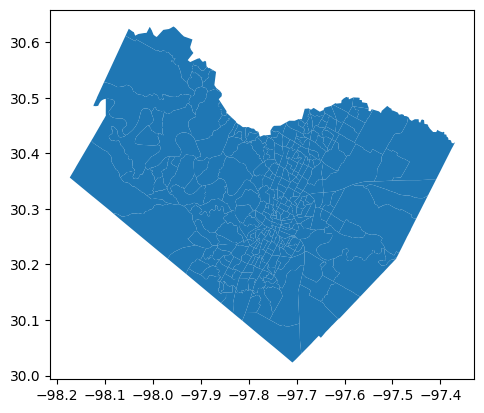

In [8]:
travis_county_census_shape_geo.plot()

In [9]:
geo_data_frame['NUM_LANES'].value_counts()

2     21110
4      2551
3      1649
6       583
1       314
8       153
5       147
7        85
9         5
10        3
Name: NUM_LANES, dtype: int64

In [10]:
geo_data_frame['CITY'].value_counts()

2100     15943
0         6160
32580     1215
23030      613
23580      467
26450      445
24210      266
29430      216
21270      188
7670       176
45180      163
3330       158
44080       88
36750       66
36400       65
10170       62
5620        56
13300       55
33210       54
41450       51
44085       41
44610       31
37870       20
47350        1
Name: CITY, dtype: int64

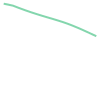

In [11]:
geo_data_frame.iloc[5].geometry

Text(0.5, 1.0, 'Austin Roadways')

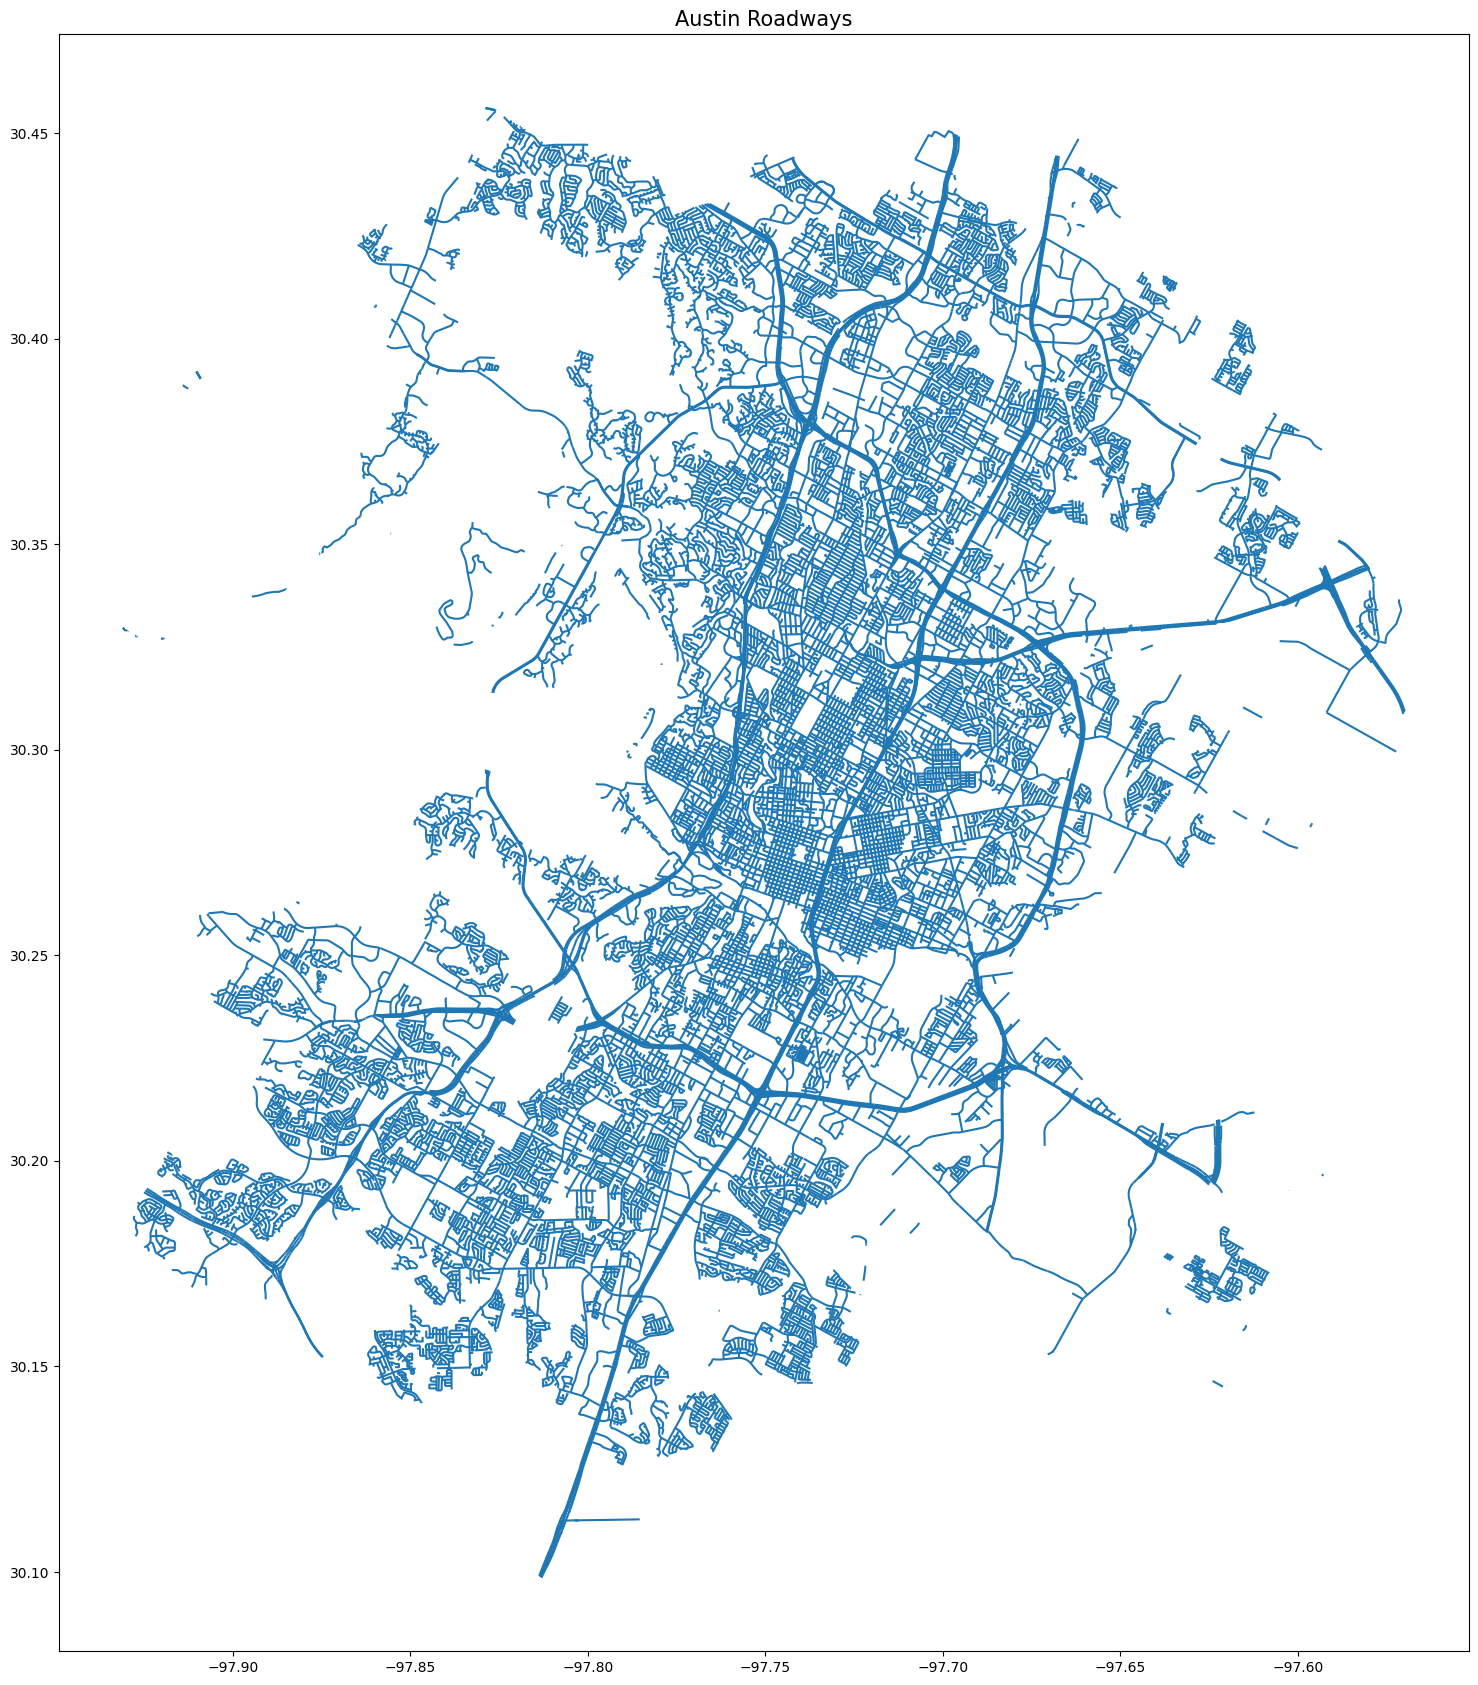

In [12]:
fig, ax = plt.subplots(figsize  = (21, 21))

geo_data_frame[geo_data_frame['CITY'] == 2100].plot(ax = ax)

ax.set_title("Austin Roadways", fontsize=15)

Text(0.5, 1.0, 'I 35 DVMT')

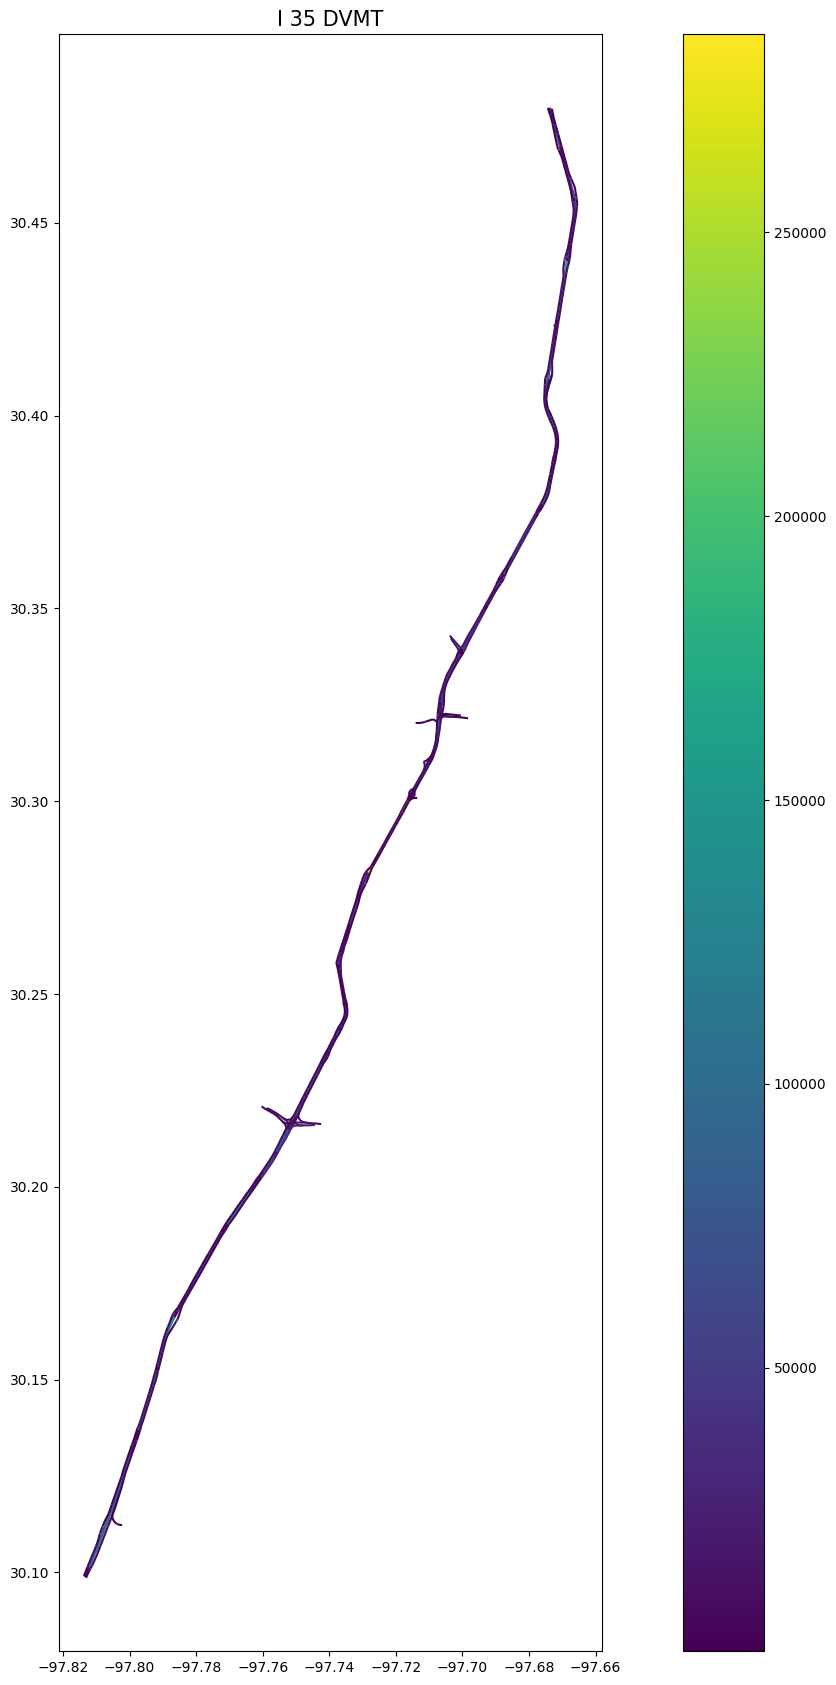

In [13]:
fig, ax = plt.subplots(figsize  = (21, 21))

geo_data_frame[geo_data_frame['HWY'] == 'IH0035'].plot(column = 'DVMT',
                    #cmap = 'magma',
                    legend = True,
                    #norm=mpl.colors.LogNorm(vmin = 0.01, vmax = 100),
                    ax = ax)


ax.ticklabel_format(useOffset=False)

ax.set_title("I 35 DVMT", fontsize=15)

<Axes: >

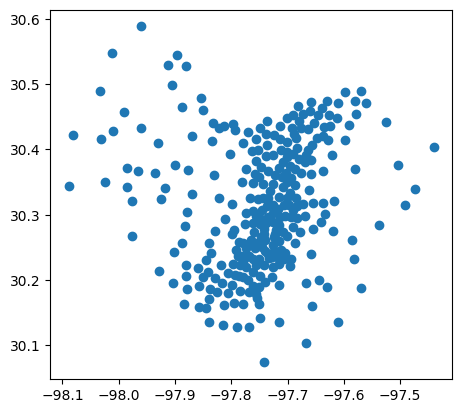

In [14]:
#travis_county_census_shape_geo.plot(column = 'tract_centroids')
#travis_county_census_shape_geo['tract_centroids']
#plt.scatter([1,4], [4,5])

#print(travis_county_census_shape_geo['tract_centroids'][2].x)

travis_county_census_shape_geo['tract_centroids'].plot()

C:\Users\aaron\AppData\Local\Programs\Python\Python310\lib\site-packages\h3pandas\h3pandas.py:498: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  .agg(operation)


Text(0.5, 1.0, 'Austin DVMT')

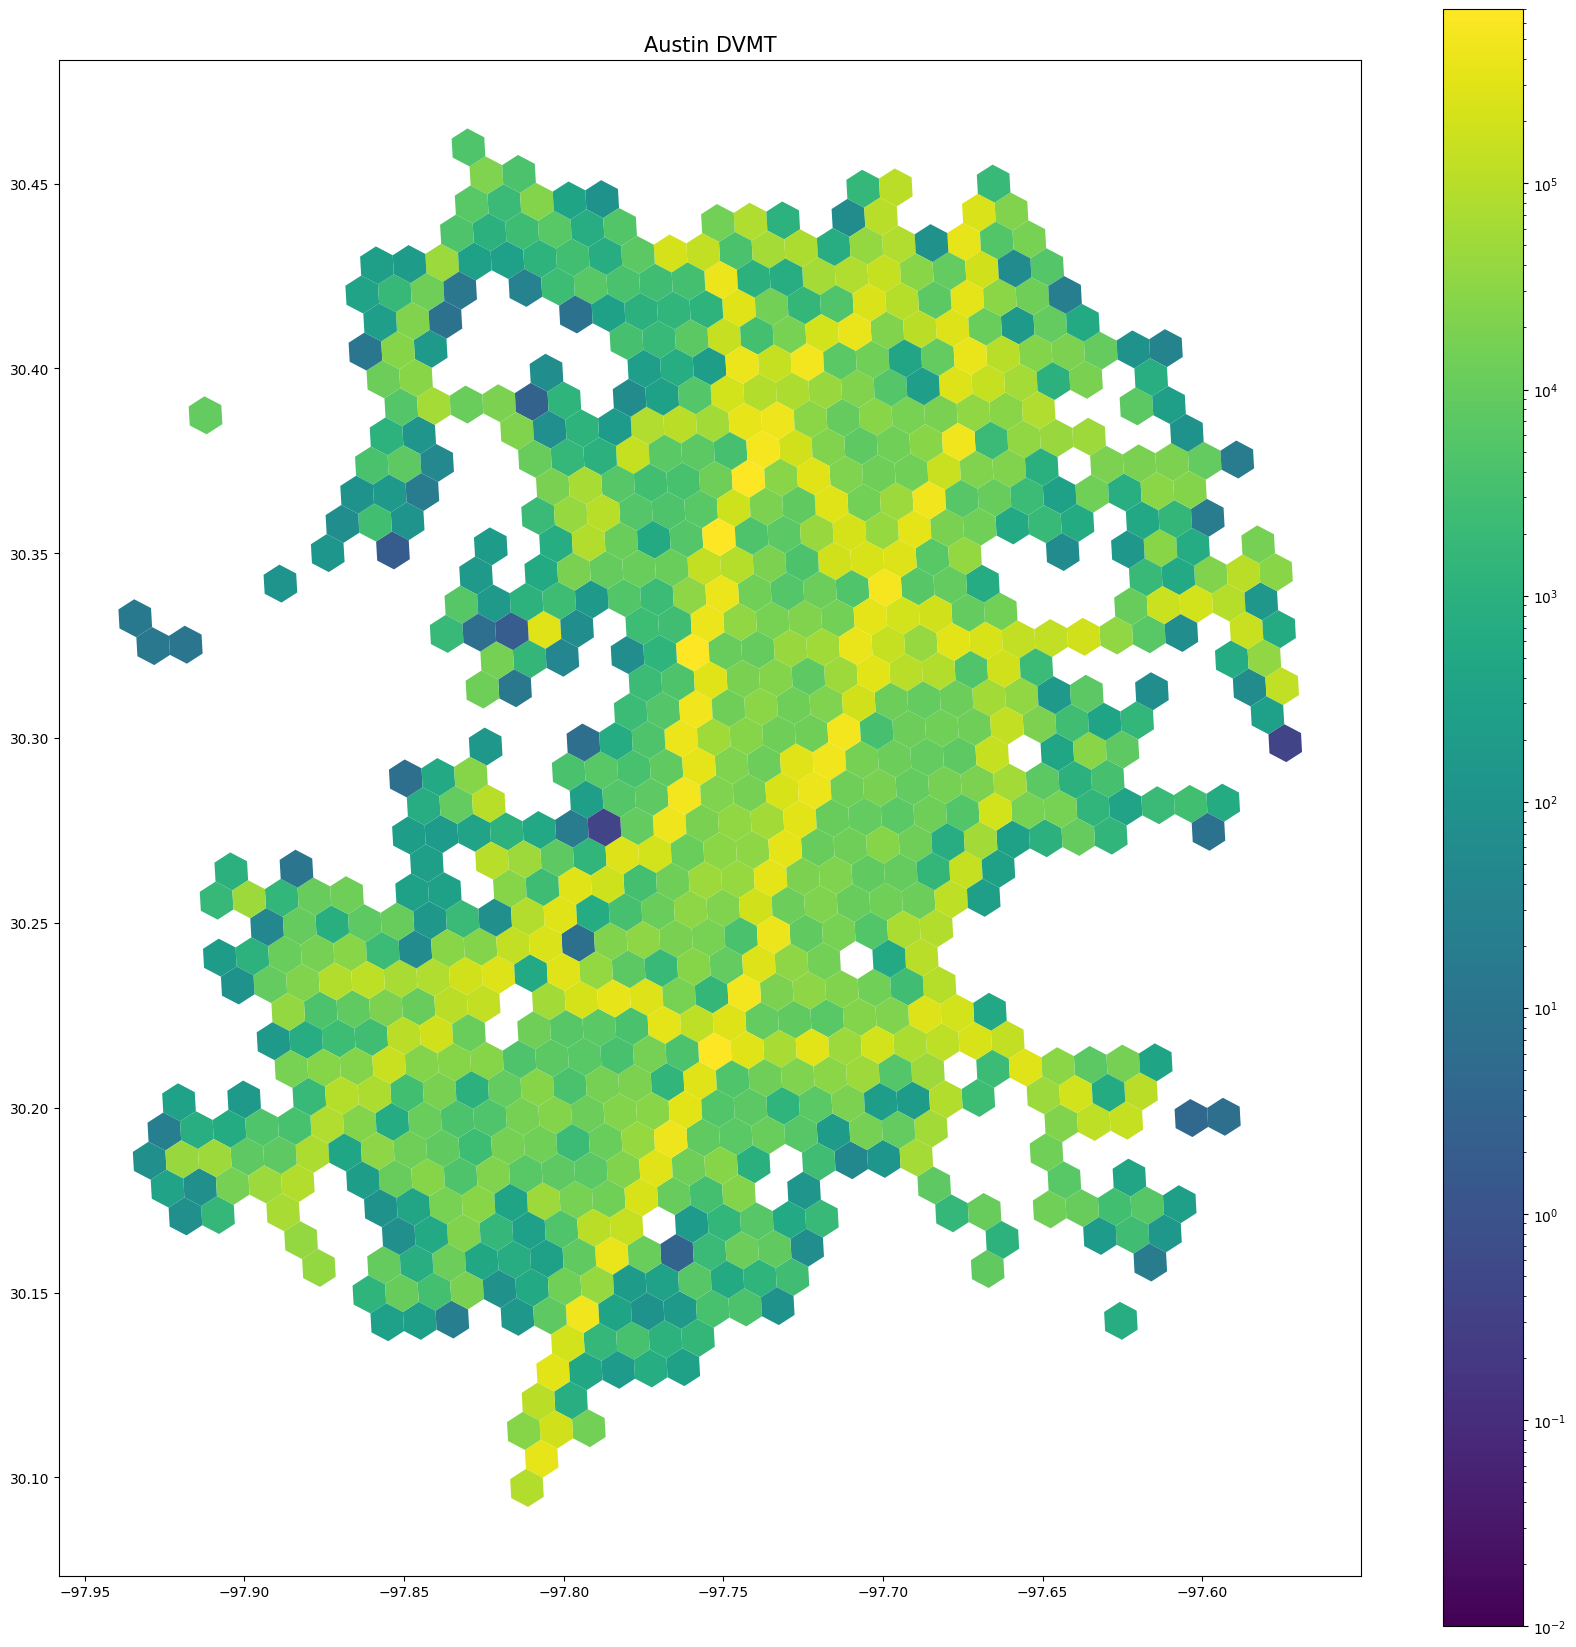

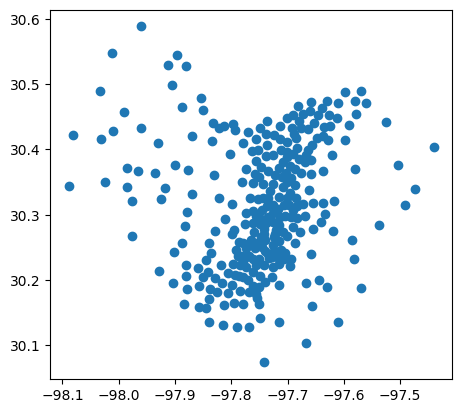

In [15]:
#hexagons = centroid_frame[centroid_frame['HWY'] == 'IH0035'].h3.geo_to_h3_aggregate(8) ### Isolating I-35

fig, ax = plt.subplots(figsize  = (21, 21))
hexagons = centroid_frame[centroid_frame['CITY'] == 2100].h3.geo_to_h3_aggregate(8)
hexagons.plot(column = 'DVMT',
                legend = True,
                norm=mpl.colors.LogNorm(vmin = 0.01, vmax = 700000),
                ax = ax)
travis_county_census_shape_geo['tract_centroids'].plot()

#ax.ticklabel_format(useOffset=False)

ax.set_title("Austin DVMT", fontsize=15)

In [16]:
hexagons.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 868 entries, 884898c807fffff to 88489eaeb7fffff
Columns: 131 entries, OBJECTID to geometry
dtypes: float64(101), geometry(1), int64(29)
memory usage: 927.4+ KB


In [17]:
### Make new column rounded
hexagons['Daily_Vehicle_Miles_Traveled'] = hexagons['DVMT'].round(1)

tt = {'Daily_Vehicle_Miles_Traveled'}


## get this to work??? norm=mpl.colors.LogNorm(vmin = 0.01, vmax = 700000)
DVMT_Interactive = hexagons.explore(column = 'DVMT', tooltip = tt)

In [18]:
#DVMT_Interactive

#DVMT_Interactive.save('DVMT_Interactive.html') ## This worked! run to save the map as an HTML page

In [19]:
geo_data_frame.head()

,OBJECTID,REC,RIA_RTE_ID,RTE_GRID,GID,FRM_DFO,TO_DFO,C_SEC,CON,SEC,BMP,EMP,HWY,HSYS,HNUM,RDBD_ID,FRM_NBR,FRM_NUM,FRM_DISP,TO_NBR,TO_NUM,TO_DISP,FRM_MKR_DA,TO_MKR_DAT,STE_NAM,DI,CO,CITY,MPA,UAN,UAN_HPMS,RU,MSA_CNTY,MAINT_DIS,MNT_SEC,PBLC_LAND,ADMIN,RDWAY_MAIN,F_SYSTEM,RU_F_SYSTE,SEC_NHS,SEC_NHS_AP,SEC_STR,SEC_TRUNK,SEC_TRK,SEC_HAZ,SEC_EVAC,SEC_NFH,SEC_STM,SEC_TTT,SEC_PARK,TOP100ID,NHFN,HWY_STAT,SPD_MAX,SCHOOL_ZN,TOLL_NM,TOLL_HPMS_,TOLL_FACIL,TOLL_CHRG_,TOLL_LANES,MNGD_LANE_,MNGD_LAN_1,MNGD_LANES,HWY_DES1,ACES_CTRL,BRDG_STRUC,MED_TYPE,MED_WID,NUM_LANES,CLMB_PS_LA,ACCEL_DECE,ROW_MIN,RB_WID,PV_RB_WID,SUR_W,S_TYPE_I,S_WID_I,S_USE_I,S_TYPE_O,S_WID_O,S_USE_O,CURB_L,CURB_R,BASE_TP,SRF_TYPE,SURF_TREAT,SURF_TRE_1,SURF_TRE_2,TRF_STA_ID,ADT_YEAR,ADT_CUR,ADT_ADJ,K_FAC,D_FAC,TRK_AADT_P,PCT_SADT,PCT_CADT,AADT_TRUCK,AADT_SINGL,AADT_COMBI,TRK_DHV_PC,PCT_SDHV,PCT_CDHV,FLEX_ESAL,RIGID_ESAL,ATH_100,ATH_PCT,MOTORCYCLE,HY_1,HY_2,HY_3,HY_4,HY_5,HY_6,HY_7,HY_8,HY_9,DESGN_YR,AADT_DESGN,INCRS_FCTR,INCRS_FC_1,DHV,TRUCK_HY_1,TRUCK_HY_2,TRUCK_HY_3,TRUCK_HY_4,TRUCK_HY_5,TRUCK_HY_6,TRUCK_HY_7,TRUCK_HY_8,TRUCK_HY_9,HPMSID,HP_VOL_GRP,RT_TURN_LA,LT_TURN_LA,LANE_WIDTH,YR_LAST_IM,YR_LAST_CN,LAST_OVRLY,PVMT_THI_1,BASE_THCK,LEN_SEC,LN_MILES,DVMT,DTRKVMT,SHAPE_Leng,geometry
0,260,0,1549145954,153710,1549145954,0.180,0.754,None,None,NaN,NaN,NaN,IH0035,IH,0035,GS,NaN,None,NaN,NaN,None,NaN,NaN,NaN,None,14,227,2100,90,90,4384,4,NaN,NaN,NaN,NaN,NaN,NaN,1,U1,0,NaN,0,0,0,0,0,0,0,0,0,NaN,NaN,6,NaN,NaN,None,None,None,NaN,NaN,NaN,NaN,NaN,1.0,NaN,None,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,227RP2901L,2022,4029,4029,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,4069.0,1614.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,None,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.574,0.574,2312.646,NaN,0.008783,"LINESTRING (-97.71111 30.32063, -97.71082 30.3..."
1,343,0,1599255034,154254,1599255034,0.000,0.004,None,None,NaN,NaN,NaN,SH0045,SH,0045,GS,NaN,None,NaN,NaN,None,NaN,NaN,NaN,None,14,227,0,90,90,4384,4,NaN,NaN,NaN,NaN,NaN,NaN,2,U2,0,20210519.0,0,0,0,0,0,0,0,0,0,NaN,NaN,6,NaN,NaN,None,None,None,NaN,NaN,NaN,NaN,NaN,1.0,NaN,None,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,227RP45105,2022,295,295,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,237.0,276.0,116.0,101.0,227.0,247.0,229.0,136.0,150.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,None,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.004,0.004,1.180,NaN,0.000065,"LINESTRING (-97.73519 30.08429, -97.73525 30.0..."
2,481,0,1599255035,154254,1599255035,0.000,0.359,None,None,NaN,NaN,NaN,SH0045,SH,0045,GS,NaN,None,NaN,NaN,None,NaN,NaN,NaN,None,14,227,0,90,90,4384,4,NaN,NaN,NaN,NaN,NaN,NaN,2,U2,0,NaN,0,0,0,0,0,0,0,0,0,NaN,NaN,6,NaN,NaN,None,None,None,NaN,NaN,NaN,NaN,NaN,1.0,NaN,None,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,227RP45103,2022,971,971,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,513.0,491.0,396.0,470.0,302.0,422.0,340.0,282.0,218.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,None,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.359,0.359,348.589,NaN,0.005817,"LINESTRING (-97.72997 30.08174, -97.73004 30.0..."
3,626,0,1599254622,154254,1599254622,0.000,0.774,None,None,NaN,NaN,NaN,SH0045,SH,0045,GS,NaN,None,NaN,NaN,None,NaN,NaN,NaN,None,14,227,32580,90,90,4384,4,NaN,NaN,NaN,NaN,NaN,NaN,2,U2,0,NaN,0,0,0,0,0,0,0,0,0,NaN,NaN,6,NaN,NaN,None,None,None,NaN,NaN,NaN,NaN,NaN,1.0,NaN,None,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,227DC45130ESFB,2022,7595,7595,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,6134.0,4563.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,None,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.774,0.774,5878.530,NaN,0.011513,"LINESTRING (-97.59671 30.47555, -97.59616 30.4..."
4,762,0,1549145954,153710,1549145954,0.172,0.1

In [20]:
hexagons.head()

,OBJECTID,REC,RTE_GRID,GID,FRM_DFO,TO_DFO,SEC,BMP,EMP,FRM_NBR,FRM_DISP,TO_NBR,TO_DISP,FRM_MKR_DA,TO_MKR_DAT,DI,CO,CITY,MPA,UAN,UAN_HPMS,RU,MSA_CNTY,MAINT_DIS,MNT_SEC,PBLC_LAND,ADMIN,RDWAY_MAIN,F_SYSTEM,SEC_NHS,SEC_NHS_AP,SEC_STR,SEC_TRUNK,SEC_TRK,SEC_HAZ,SEC_EVAC,SEC_NFH,SEC_STM,SEC_TTT,SEC_PARK,TOP100ID,NHFN,HWY_STAT,SPD_MAX,SCHOOL_ZN,TOLL_CHRG_,TOLL_LANES,MNGD_LANE_,MNGD_LAN_1,MNGD_LANES,HWY_DES1,ACES_CTRL,MED_TYPE,MED_WID,NUM_LANES,CLMB_PS_LA,ACCEL_DECE,ROW_MIN,RB_WID,PV_RB_WID,SUR_W,S_TYPE_I,S_WID_I,S_USE_I,S_TYPE_O,S_WID_O,S_USE_O,CURB_L,CURB_R,BASE_TP,SRF_TYPE,SURF_TREAT,SURF_TRE_1,SURF_TRE_2,ADT_YEAR,ADT_CUR,ADT_ADJ,K_FAC,D_FAC,TRK_AADT_P,PCT_SADT,PCT_CADT,AADT_TRUCK,AADT_SINGL,AADT_COMBI,TRK_DHV_PC,PCT_SDHV,PCT_CDHV,FLEX_ESAL,RIGID_ESAL,ATH_100,ATH_PCT,MOTORCYCLE,HY_1,HY_2,HY_3,HY_4,HY_5,HY_6,HY_7,HY_8,HY_9,DESGN_YR,AADT_DESGN,INCRS_FCTR,INCRS_FC_1,DHV,TRUCK_HY_1,TRUCK_HY_2,TRUCK_HY_3,TRUCK_HY_4,TRUCK_HY_5,TRUCK_HY_6,TRUCK_HY_7,TRUCK_HY_8,TRUCK_HY_9,HP_VOL_GRP,RT_TURN_LA,LT_TURN_LA,LANE_WIDTH,YR_LAST_IM,YR_LAST_CN,LAST_OVRLY,PVMT_THI_1,BASE_THCK,LEN_SEC,LN_MILES,DVMT,DTRKVMT,SHAPE_Leng,geometry,Daily_Vehicle_Miles_Traveled
h3_08,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
884898c807fffff,908367,10,655718,5007456365,26.606,27.138,68.0,8.869,9.120,1588.0,10.682,1588.0,11.104,60663682.0,60663682.0,56,908,8400,360,360,17536,16,3.0,42.0,33.0,0.0,7.0,7.0,16,3,0.0,0,0,0,0,0,0,0,0,0,3000044.0,0.0,24,165.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,9.0,21.0,9.0,10,0.0,0.0,300.0,160.0,160.0,115.0,3.0,15.0,15.0,3.0,30.0,15.0,0.0,0.0,18.0,129.0,0.0,0.0,0.0,8086,64548,64548,34.5,276.0,16.7,13.8,2.9,2905.0,2593.0,312.0,12.6,10.4,2.2,4359.0,5253.0,93.0,90.0,39,90447.0,84099.0,102150.0,96432.0,98565.0,107256.0,96738.0,84195.0,92673.0,8168.0,90288.0,5.2,25740.0,7340.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19,0.0,0.0,46.0,0.0,0.0,0.0,0.0,0.0,0.532,1.346,9073.772,408.422,0.008121,"POLYGON ((-97.91185 30.38217, -97.90691 30.384...",9073.8
884898c901fffff,1072816,14,387952,461892,0.000,0.618,148.0,0.000,0.618,0.0,0.000,0.0,0.000,0.0,0.0,28,454,4200,180,180,8768,8,0.0,0.0,0.0,0.0,8.0,8.0,14,0,0.0,0,0,0,0,0,0,0,0,0,0.0,0.0,12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,198.0,0.0,0.0,0.0,4040,390,390,20.4,120.0,6.4,3.6,2.8,14.0,8.0,6.0,4.8,2.8,2.0,0.0,0.0,0.0,0.0,0,390.0,390.0,810.0,810.0,0.0,0.0,0.0,0.0,0.0,4084.0,390.0,2.0,0.0,82.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,0.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.618,1.236,120.510,4.326,0.010082,"POLYGON ((-97.84492 30.37683, -97.83998 30.379...",120.5
884898c903fffff,3666541,35,875759,580971,1.593,2.519,43.0,1.593,2.519,0.0,0.000,0.0,0.000,0.0,0.0,70,1135,10500,450,450,21920,20,0.0,0.0,0.0,0.0,20.0,20.0,29,0,0.0,0,0,0,0,0,0,0,0,0,0.0,0.0,30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,0.0,0.0,0.0,10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,228.0,0.0,0.0,0.0,10100,21702,21702,44.7,273.0,10.9,6.9,4.0,338.0,248.0,90.0,8.1,5.2,2.9,0.0,0.0,0.0,0.0,102,21702.0,21702.0,37110.0,37110.0,36300.0,36300.0,36300.0,30630.0,30630.0,10210.0,32358.0,6.5,10656.0,2671.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14,0.0,0.0,80.0,0.0,0.0,0.0,0.0,0.0,0.926,1.852,5673.225,86.777,0.014011,"POLYGON ((-97.85053 30.38436, -97.84559 30.387...",5673.2
884898c907fffff,1442644,17,853456,8348402752,2.277,4.656,3.0,0.897,1.703,526.0,0.789,526.0,1.464,20221219.0,20221219.0,70,1135,10500,450,450,21920,20,3.0,42.0,33.0,0.0,11.0,11.0,23,3,40442462.0,0,0,0,0,0,0,0,0,0,3000038.0,0.0,30,135.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,9.0,9.0,15.0,16,1.0,0.0,582.0,256.0,256.0,241.0,0.0,0.0,0.0,3.0,15.0,15.0,15.0,15.0,15.0,216.0,27.0,4.5,6066.0,10106,81846,81846,43.5,276.0,10.9,7.5,3.4,1307.0,1100.0,207.0,8.4,5.8,2.6,2409.0,2859.0,93.0,90.0,63,40408.0,27985.0,39447.0,43182.0,39021.0,40304.0,38854.0,34328.0,37876.0,10210.0,114429.0,6.2,32583.0,8863.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20,0.0,0.0,53.0,6066.0,0.0,4.5,19.5,2

In [21]:
### make a bins column for the hexagons DF
### The astype str was done because the folium mapping couldnt handlethe original datatype.
hexagons['DVMT_bins'] = pd.cut(x = hexagons['DVMT'], bins = [0, 1000, 10000, 100000, 500000, 1000000]).astype('str')

In [22]:
hexagons['DVMT_bins'].info()

<class 'pandas.core.series.Series'>
Index: 868 entries, 884898c807fffff to 88489eaeb7fffff
Series name: DVMT_bins
Non-Null Count  Dtype 
--------------  ----- 
868 non-null    object
dtypes: object(1)
memory usage: 45.9+ KB


In [23]:
tt = {'Daily_Vehicle_Miles_Traveled'}


## get this to work??? norm=mpl.colors.LogNorm(vmin = 0.01, vmax = 700000)
DVMT_Interactive_bins = hexagons.explore(column = 'DVMT_bins', cmap = 'OrRd', tooltip = tt)

In [24]:
#DVMT_Interactive_bins

#DVMT_Interactive_bins.save('DVMT_Interactive_bins.html') ## This worked! run to save the map as an HTML page

Text(0.5, 1.0, 'Tract drove alone PCT')

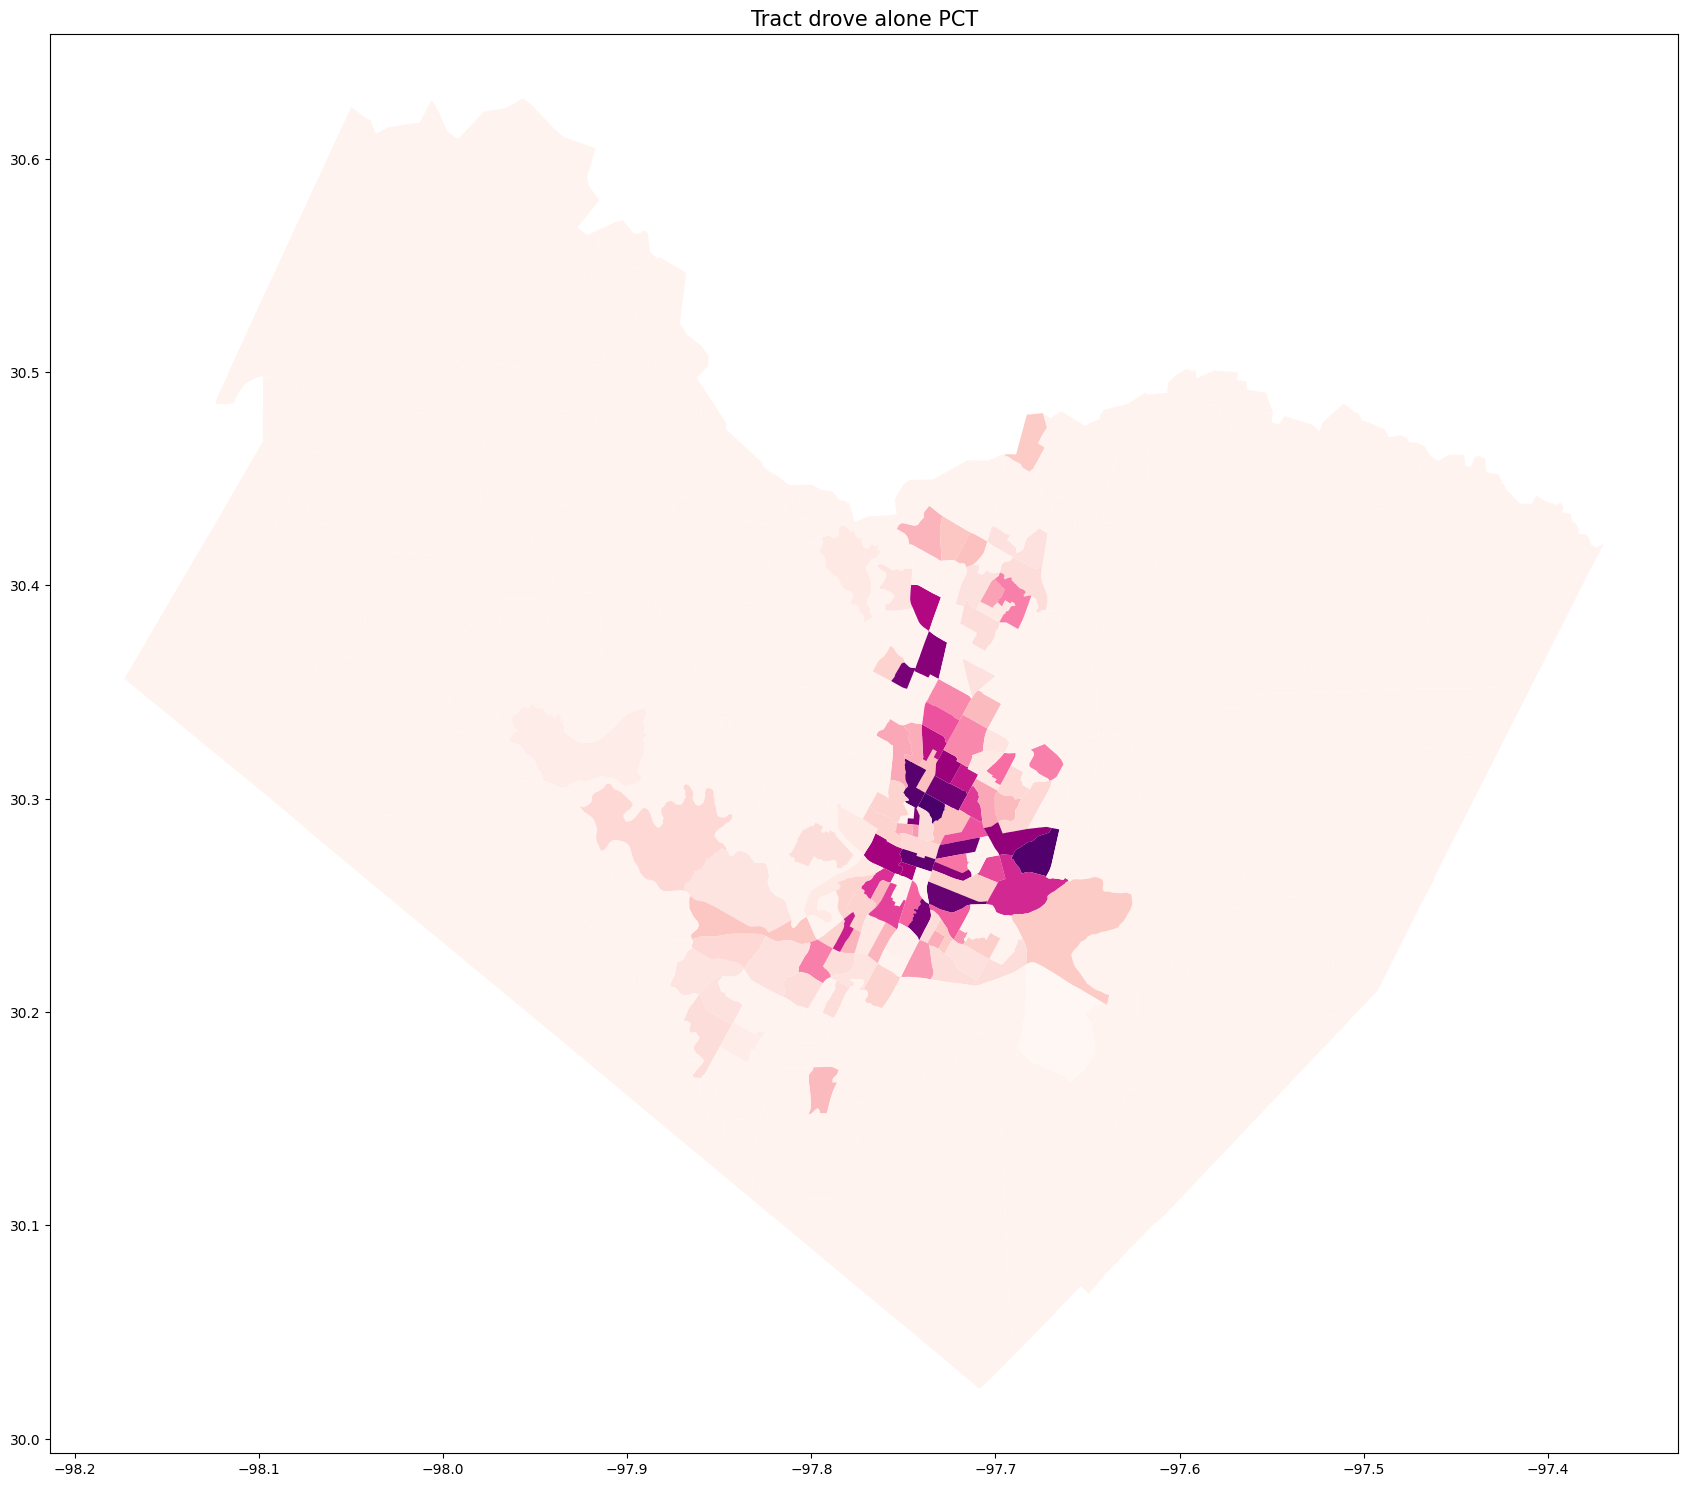

In [25]:


fig, ax = plt.subplots(figsize  = (21, 21))

travis_county_census_shape_geo.plot(column = 'Estimate!!Total!!Workers 16 years and over!!MEANS OF TRANSPORTATION TO WORK!!Bicycle',
                    cmap = 'RdPu',
                    #legend = True,
                    #norm=mpl.colors.LogNorm(vmin = 0.01, vmax = 100),
                    ax = ax)


ax.ticklabel_format(useOffset=False)

ax.set_title("Tract drove alone PCT", fontsize=15)

In [26]:
census_centroid_frame = travis_county_census_shape_geo.set_geometry(travis_county_census_shape_geo['tract_centroids'])

census_centroid_frame.head()

census_hexagons = census_centroid_frame.h3.geo_to_h3_aggregate(8)

C:\Users\aaron\AppData\Local\Programs\Python\Python310\lib\site-packages\h3pandas\h3pandas.py:498: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  .agg(operation)


In [27]:
census_hexagons.head()

,NaN,ALAND,AWATER,geometry
h3_08,,,,
8848985003fffff,0.0,6265173,0,"POLYGON ((-97.89688 30.54495, -97.89194 30.547..."
884898505dfffff,0.0,7656661,0,"POLYGON ((-97.91072 30.52129, -97.90577 30.524..."
884898506bfffff,0.0,7280834,0,"POLYGON ((-97.88002 30.52237, -97.87507 30.525..."
88489850d1fffff,0.0,60143060,9010,"POLYGON ((-97.95572 30.58148, -97.95077 30.584..."
884898522bfffff,0.0,9990006,680206,"POLYGON ((-97.90870 30.49046, -97.90375 30.493..."


<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 282 entries, 8848985003fffff to 88489eaf3dfffff
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   nan       282 non-null    float64 
 1   ALAND     282 non-null    int64   
 2   AWATER    282 non-null    int64   
 3   geometry  282 non-null    geometry
dtypes: float64(1), geometry(1), int64(2)
memory usage: 19.1+ KB


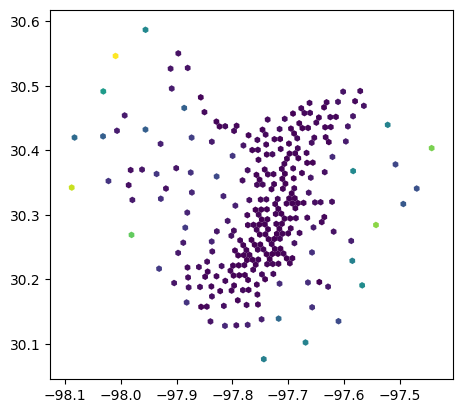

In [28]:
#census_hexagons.plot(column = 'Estimate!!Total!!Workers 16 years and over!!MEANS OF TRANSPORTATION TO WORK!!Bicycle')

census_hexagons.plot(column = 'ALAND')

census_hexagons.info()